In [1]:
import sys
sys.executable

'/home/charles/anaconda3/envs/kaggle/bin/python'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Step 1. Load the data.

In [3]:
# Load train data
train = pd.read_csv('data/train.csv')
print(train.shape)
print(train.dtypes)
train.head()

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Load test data
X_test = pd.read_csv('data/test.csv')
print(X_test.shape)
X_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Partition training data into features and labels
X_train = train.drop('Survived', axis=1)
y_train = train['Survived'].values
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Convert columns to correct data type
X_train['Pclass'] = X_train['Pclass'].astype('category')
X_test['Pclass'] = X_test['Pclass'].astype('category')

In [9]:
categorical = ['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
numerical = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']
X_train[categorical].describe()

,PassengerId,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891,204,889
unique,891,3,891,2,681,147,3
top,891,3,"Honkanen, Miss. Eliina",male,CA. 2343,C23 C25 C27,S
freq,1,491,1,577,7,4,644


In [10]:
X_test[categorical].describe()

,PassengerId,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,418,418,91,418
unique,418,3,418,2,363,76,3
top,1309,3,"Gibson, Miss. Dorothy Winifred",male,PC 17608,B57 B59 B63 B66,S
freq,1,218,1,266,5,3,270


In [8]:
# Count number of unique values per feature
for col in X_train.columns:
    print("{}: {} unique values (train set), {} unique values (test set)".format(
        col, X_train[col].nunique(), test[col].nunique()))

PassengerId: 891 unique values (train set), 418 unique values (test set)
Pclass: 3 unique values (train set), 3 unique values (test set)
Name: 891 unique values (train set), 418 unique values (test set)
Sex: 2 unique values (train set), 2 unique values (test set)
Age: 88 unique values (train set), 79 unique values (test set)
SibSp: 7 unique values (train set), 7 unique values (test set)
Parch: 7 unique values (train set), 8 unique values (test set)
Ticket: 681 unique values (train set), 363 unique values (test set)
Fare: 248 unique values (train set), 169 unique values (test set)
Cabin: 147 unique values (train set), 76 unique values (test set)
Embarked: 3 unique values (train set), 3 unique values (test set)


/home/charles/anaconda3/envs/kaggle/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/charles/anaconda3/envs/kaggle/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


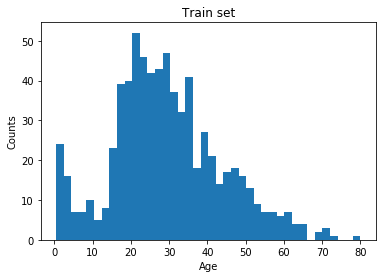

ValueError: operands could not be broadcast together with shapes (418,) (891,) 

In [13]:
alpha = 1

# Plot histograms
def plot_histogram(data, col, title):
    plt.hist(data, bins=40)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.show()

for col in X_train.columns:
    if X_train.dtypes[col] != 'object':
        data = X_train[col].values
        plot_histogram(data, col, 'Train set')
        plot_histogram((X_test[col].values + alpha) / (data + alpha), col, 'Train set / Test set')
        plot_histogram((data[y_train == 1] + alpha) / (data[y_train == 0] + alpha), 'Survived = 1 / Survived = 0')